In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.oauth2 import service_account

pd.options.mode.chained_assignment = None # default='warn'

credentials = service_account.Credentials.from_service_account_file(
    'google_key.json',
    scopes=['https://www.googleapis.com/auth/cloud-platform'],
)

query = 'SELECT * FROM `gd_empreendimentos.projetos_2023`;' # view com os projetos recentes (2023)

usinas_2023 = pd.read_gbq(query, credentials=credentials)

usinas_2023.head(2)

,_id,SigAgente,DscClasseConsumo,NomRegiao,SigUF,NomMunicipio,SigTipoConsumidor,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscFonteGeracao,MdaPotenciaInstaladaKW,GeracaoMWh,DistParceira
0,1852872,CPFL- PIRATININGA,Comercial,Sudeste,SP,Porto Feliz,PJ,2023-01-01 00:00:00+00:00,P,Radiação solar,1000.0,201.0,0
1,209347,CEBDIS,Comercial,Centro Oeste,DF,Brasília,PJ,2023-01-01 00:00:00+00:00,P,Radiação solar,624.0,93.6,1


### ANÁLISE DOS PROJETOS RECENTES (JAN-MAI 2023)
Quanto a Lemon pode ganhar em capacidade de geração com os projetos de 2023?

In [2]:
# seleção das usinas conectadas a distribuidoras parceiras, e informações da tabela

usinas_2023_par = usinas_2023[usinas_2023['DistParceira']==1]
usinas_2023_par.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 95
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   _id                           31 non-null     Int64              
 1   SigAgente                     31 non-null     object             
 2   DscClasseConsumo              31 non-null     object             
 3   NomRegiao                     31 non-null     object             
 4   SigUF                         31 non-null     object             
 5   NomMunicipio                  31 non-null     object             
 6   SigTipoConsumidor             31 non-null     object             
 7   DthAtualizaCadastralEmpreend  31 non-null     datetime64[ns, UTC]
 8   SigModalidadeEmpreendimento   31 non-null     object             
 9   DscFonteGeracao               31 non-null     object             
 10  MdaPotenciaInstaladaKW        31 non-nul

In [3]:
# estatísticas resumidas de cada feature

usinas_2023_par.describe()

,_id,MdaPotenciaInstaladaKW,GeracaoMWh,DistParceira
count,31.0,31.000000,31.000000,31.0
mean,797065.096774,1415.037097,278.698710,1.0
std,546156.717454,826.104219,166.953861,0.0
min,209347.0,624.000000,93.600000,1.0
25%,581695.0,921.200000,185.160000,1.0
50%,585611.0,1000.000000,201.000000,1.0
75%,588433.5,1990.000000,349.500000,1.0
max,1894287.0,3500.000000,703.500000,1.0


Antes de calcular o potencial de ganho em geração com os projetos recentes, é preciso identificar se há outliers (valores atípicos) na base de dados e, se houver, removê-los de forma que o cálculo não fique enviesado.

<AxesSubplot:xlabel='GeracaoMWh', ylabel='Count'>

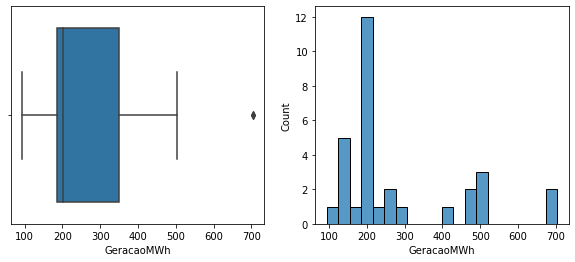

In [4]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

sns.boxplot(x='GeracaoMWh', data=usinas_2023_par, ax=ax[0])
sns.histplot(x='GeracaoMWh', data=usinas_2023_par, bins=20, ax=ax[1])

In [5]:
usinas_2023_par = usinas_2023_par.sort_values('GeracaoMWh', ascending=False)
usinas_2023_par.head(10)

,_id,SigAgente,DscClasseConsumo,NomRegiao,SigUF,NomMunicipio,SigTipoConsumidor,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscFonteGeracao,MdaPotenciaInstaladaKW,GeracaoMWh,DistParceira
79,1881636,ELEKTRO,Comercial,Sudeste,SP,Santa Clara D'Oeste,PJ,2023-03-20 00:00:00+00:00,P,Radiação solar,3500.0,703.50,1
15,1838151,CPFL-PAULISTA,Comercial,Sudeste,SP,Icém,PJ,2023-01-19 00:00:00+00:00,R,Radiação solar,3500.0,703.50,1
64,581711,CEMIG-D,Rural,Sudeste,MG,Araçuaí,PJ,2023-03-03 00:00:00+00:00,P,Radiação solar,2500.0,502.50,1
75,585726,CEMIG-D,Comercial,Sudeste,MG,Pains,PJ,2023-03-10 00:00:00+00:00,P,Radiação solar,2500.0,502.50,1
57,585466,CEMIG-D,Comercial,Sudeste,MG,Araxá,PJ,2023-02-23 00:00:00+00:00,P,Radiação solar,2500.0,502.50,1
53,581612,CEMIG-D,Rural,Sudeste,MG,Montes Claros,PJ,2023-02-20 00:00:00+00:00,P,Radiação solar,2400.0,482.40,1
85,588430,CEMIG-D,Comercial,Sudeste,MG,Uberlândia,PJ,2023-03-29 00:00:00+00:00,P,Radiação solar,2400.0,482.40,1
42,581679,CEMIG-D,Rural,Sudeste,MG,Salinas,PJ,2023-02-06 00:00:00+00:00,P,Radiação solar,2000.0,402.00,1
95,212494,CEBDIS,Residencial,Centro Oeste,DF,Brasília,PF,2023-04-19 00:00:00+00:00,P,Radiação solar,1980.0,297.00,1
74,585564,CEMIG-D,Comercial,Sudeste,MG,Paraisópolis,PJ,2023-03-09 00:00:00+00:00,P,Radiação solar,1225.0,246.22,1


Pelo gráfico de caixa, percebe-se 2 outliers, com geração de 700MWh/mês. Ao checar a distribuição/histograma de geração, percebe-se ainda que projetos acima de 300MWh/mês pode potencialmente enviesar o cálculo da nossa média de geração. Para corrigir isso (e consequentemente diminuir a média de geração por projeto), é preciso retirar usinas que geram acima de 300MWh/mês.

In [6]:
# remove as usinas com geração atípica da base (outliers)

usinas_2023_par = usinas_2023_par[usinas_2023_par['GeracaoMWh']<=300]

usinas_2023_par.head(5)

,_id,SigAgente,DscClasseConsumo,NomRegiao,SigUF,NomMunicipio,SigTipoConsumidor,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscFonteGeracao,MdaPotenciaInstaladaKW,GeracaoMWh,DistParceira
95,212494,CEBDIS,Residencial,Centro Oeste,DF,Brasília,PF,2023-04-19 00:00:00+00:00,P,Radiação solar,1980.0,297.00,1
74,585564,CEMIG-D,Comercial,Sudeste,MG,Paraisópolis,PJ,2023-03-09 00:00:00+00:00,P,Radiação solar,1225.0,246.22,1
76,585555,CEMIG-D,Comercial,Sudeste,MG,Paraisópolis,PJ,2023-03-10 00:00:00+00:00,P,Radiação solar,1225.0,246.22,1
70,585694,CEMIG-D,Residencial,Sudeste,MG,Grão Mogol,PJ,2023-03-06 00:00:00+00:00,P,Radiação solar,1146.0,230.35,1
88,589784,CEMIG-D,Comercial,Sudeste,MG,Taiobeiras,PJ,2023-04-03 00:00:00+00:00,P,Radiação solar,1000.0,201.00,1


<AxesSubplot:xlabel='GeracaoMWh', ylabel='Count'>

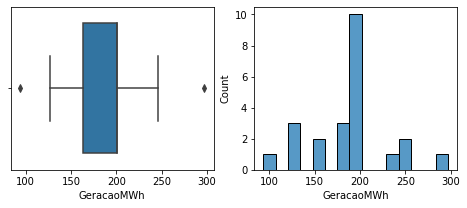

In [7]:
# checar se ainda há outliers
fig, ax = plt.subplots(1,2, figsize=(8,3))

sns.boxplot(x='GeracaoMWh', data=usinas_2023_par,ax=ax[0])
sns.histplot(x='GeracaoMWh', data=usinas_2023_par, bins=15,ax=ax[1])

Ainda há valores fora dos limites superior e inferior no boxplot, porém são simétricos e não devem atrapalhar o cálculo da média, e a distribuição mostra uma aproximação normal, com maior concentração na região central de 200MWh/mês, de forma que achar a tendência central pela média é uma boa aproximação.

In [8]:
usinas_2023_par.describe()

,_id,MdaPotenciaInstaladaKW,GeracaoMWh,DistParceira
count,23.0,23.000000,23.000000,23.0
mean,760200.304348,981.136957,189.493913,1.0
std,538729.482276,272.629553,44.629987,0.0
min,209347.0,624.000000,93.600000,1.0
25%,583538.0,875.000000,163.315000,1.0
50%,585611.0,1000.000000,201.000000,1.0
75%,587341.5,1000.000000,201.000000,1.0
max,1894287.0,1980.000000,297.000000,1.0


Analisando os dados acima, temos 31 projetos recentes em 2023, incluindo os projetos com geração muito acima. A capacidade média de geração é de aproximadamente 190MWh/mês (removendo os outliers). Dado a premissa de conversão de 6.4%, é possível inferir que 2 dos 31 projetos podem se tornar parceiros da Lemon. Admitindo a geração média de 190MWh/mês, converter 2 usinas pode gerar um ganho aproximado de 380MWh/mês, ou seja, 5.5% do nosso objetivo.

---

### PREVISÃO DE NOVOS PROJETOS NAS DISTRIBUIDORAS PARCEIRAS

Qual a número de projetos e capacidade média de geração por ano? Isso segue uma tendência? É correto utilizar regressão para prever o número de novos projetos e a capacidade média de geração nos próximos 2 anos?

In [9]:
# seleciona a view "projetos_sel", com todos os projetos que se enquadram

query = 'SELECT * FROM `gd_empreendimentos.projetos_sel`;'

usinas_tot = pd.read_gbq(query, credentials=credentials)

usinas_tot.head(2)

,_id,SigAgente,DscClasseConsumo,NomRegiao,SigUF,NomMunicipio,SigTipoConsumidor,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscFonteGeracao,MdaPotenciaInstaladaKW,GeracaoMWh,DistParceira
0,169170,ENEL CE,Poder Público,Nordeste,CE,Juazeiro do Norte,PJ,2022-05-26 00:00:00+00:00,P,Radiação solar,610.0,109.8,0
1,323970,Equatorial MA,Serviço Público,Nordeste,MA,Timon,PJ,2020-06-09 00:00:00+00:00,R,Radiação solar,1000.0,180.0,0


In [10]:
# seleciona apenas distribuidoras parceiras, cria uma coluna com o ano
# agrupa quantidade de projetos e geracao media por ano

usinas_tot_par = usinas_tot[usinas_tot['DistParceira']==1]
usinas_tot_par['Ano'] = usinas_tot_par['DthAtualizaCadastralEmpreend'].dt.year

usinas_qtd_par = usinas_tot_par.groupby(['Ano'])['Ano'].size().reset_index(name='QtdUsinas')
usinas_qtd_par = usinas_qtd_par[usinas_qtd_par['Ano'] != 2023]

usinas_ger_par = usinas_tot_par.groupby(['Ano'])['GeracaoMWh'].mean().reset_index(name='GeracaoMediaMWh')

<AxesSubplot:xlabel='Ano', ylabel='GeracaoMediaMWh'>

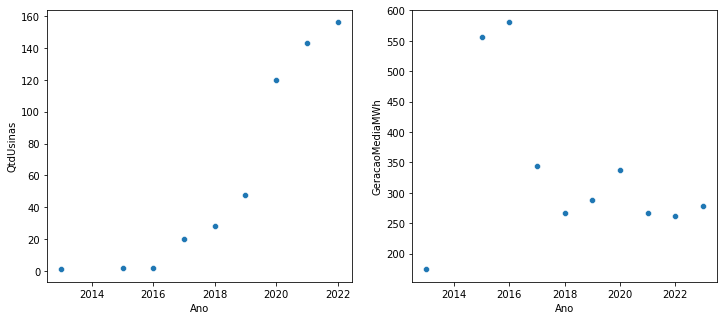

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(ax=ax[0], x='Ano', y='QtdUsinas', data=usinas_qtd_par)
sns.scatterplot(ax=ax[1], x='Ano', y='GeracaoMediaMWh', data=usinas_ger_par)

In [12]:
usinas_qtd_par

,Ano,QtdUsinas
0,2013,1
1,2015,2
2,2016,2
3,2017,20
4,2018,28
5,2019,48
6,2020,120
7,2021,143
8,2022,156


Apenas a partir de 2017 pode-se ter um resultado estatisticamente significante, dado que nos anos anteriores haviam no máximo 2 projetos com os requisitos de negócio da Lemon em cada ano. Também é possível ver que, a partir de 2016, houve um aumento aparentemente linear na quantidade de usinas. Isso pode ser explicado pela resolução 687/2015 da ANEEL, publicada em 2015 e válida a partir de 2016, que apresenta diversas melhorias para o setor de geração distribuída, incluindo novas fontes de geração, novas modalidades, maior capacidade total, etc. 
Agora, pode-se analisar a viabilidade de traçar uma regressão linear e prever a quantidade de novos projetos para os próximos 2 anos.

Em relação a geração media, o gráfico apresenta mais variabilidade. No entanto, como já visto, resultados antes de 2017 não são estatisticamente significantes pela baixa quantidade da amostra. A partir de 2017 é possível ver uma tendência de estabilidade. Será feita uma análise mais detalhada.

### Análise da Quantidade de Novos Projetos

O scatterplot acima mostra que a quantidade de projetos é aparentemente linear. Apesar da pequena quantidade dados, faz sentido linearizar os dados, visto que aparentemente eles tendem a uma reta. No entanto, ainda é bom analisar outras métricas para decidir se podemos aplicar a linearidade. São elas:

- Normalidade: os erros devem ter uma distribuição aproximadamente normal
- Homocedasticidade: a variabilidade dos erros é igual para todos os valores previstos

c:\Users\ediga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


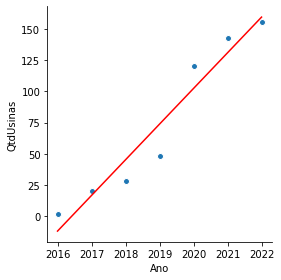

In [13]:
# interpolando uma reta

from sklearn.linear_model import LinearRegression

usinas_qtd_par = usinas_qtd_par[usinas_qtd_par['Ano']>=2016]

model = LinearRegression()
model.fit(np.array(usinas_qtd_par['Ano']).reshape(-1, 1), usinas_qtd_par['QtdUsinas'])

usinas_qtd_par['QtdUsinasPrev'] = model.predict(np.array(usinas_qtd_par['Ano']).reshape(-1, 1))

g = sns.FacetGrid(usinas_qtd_par, height=4)
g = g.map(plt.scatter, 'Ano', 'QtdUsinas', edgecolor="w")
plt.plot(usinas_qtd_par['Ano'], usinas_qtd_par['QtdUsinasPrev'], color='r')
plt.show()

c:\Users\ediga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


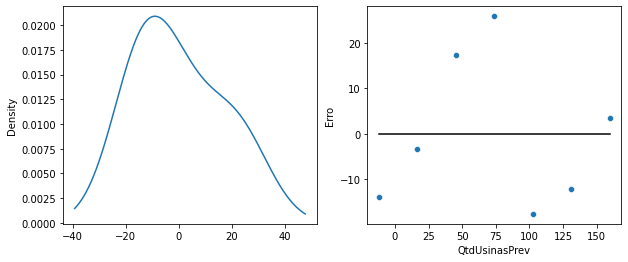

In [14]:
# analisando normalidade/homocedasticidade dos resíduos
fig, ax = plt.subplots(1,2, figsize=(10,4))

# plot de distribuicao dos erro
usinas_qtd_par['Erro'] = usinas_qtd_par['QtdUsinasPrev'] - usinas_qtd_par['QtdUsinas']

usinas_qtd_par['Erro'].plot(kind='kde', ax=ax[0])

#plot de variabilidade do erro
sns.scatterplot(usinas_qtd_par['QtdUsinasPrev'], usinas_qtd_par['Erro'], ax=ax[1])
ax[1].plot(usinas_qtd_par['QtdUsinasPrev'], np.linspace(0, 0, 7), color='black')

plt.show()

Como visto acima, é difícil analisar a distribuição do erro pela quantidade pequena de dados, de qualquer forma, pode-se aproximar o erro por uma normal, e os erros possuem uma variabilidade simétrica em relação ao eixo y. Logo, é viável utilizar regressão linear para prever o número de projetos novos.

Assumindo que a base contemple projetos até maio de 2023, o objetivo se inicia no mês de junho de 2023 e vai até o final de maio de 2025. No entanto, como foi considerado um prazo de 3 meses para o período de negociação com as usinas, é preciso calcular os projetos novos até meados de abril de 2025, 1 a 2 meses antes da data final do objetivo, visto negociar com usinas muito perto do período final pode ultrapassar o prazo de 2 anos, nesse cenário ainda adicionando uma "gordura" de 1 a 2 meses após o prazo final. Com isso em mente, será calculado a quantidade de projetos previstos nesse período de maio-2023 a inicio de abril-2025.

In [15]:
inicio_ano_1 = 2023+6/12              # inicio no começo de junho
inicio_ano_2 = inicio_ano_1+1         # inicio do ano 2

qtd_usinas_ano_1 = model.coef_ * inicio_ano_1 + model.intercept_
qtd_usinas_ano_2 = model.coef_ * inicio_ano_2 + model.intercept_

# multiplica-se por 11/12 visto que negociações a partir de maio-2025 já não forão parte da contabilidade do objetivo
print(qtd_usinas_ano_1+qtd_usinas_ano_2*(11/12))

[414.17857143]


Como calculado, é previsto o surgimento de aproximadamente 414 novas usinas que se enquandram no modelo de negócio da Lemon nos próximos 2 anos. Para calcular o possível ganho de geração, precisamos também prever a geração média das usinas nos próximos 2 anos.

### Análise da Capacidade de Geração de Novos Projetos

Como visto no gráfico de geração por ano, a capacidade de geração a cada ano é mais incerta, porém tende a se estabilizar a partir de 2017. Podemos então considerar a análise iniciando neste ano, e também encontrar possíveis outliers que podem estar enviesando a análise.

<AxesSubplot:xlabel='GeracaoMWh', ylabel='Count'>

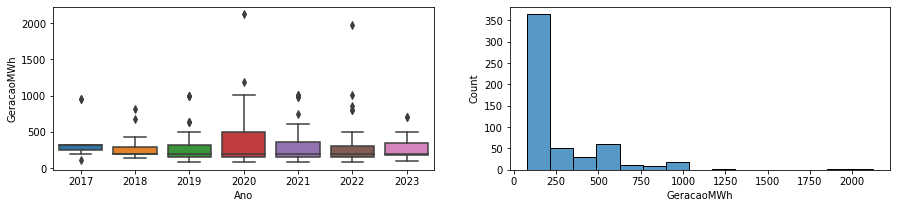

In [16]:
# seleciona projetos a partir de 2017 e analisa se há outliers em cada ano
usinas_tot_par_2017 = usinas_tot_par[usinas_tot_par['Ano'] >= 2017]

fig, ax = plt.subplots(1,2, figsize=(15,3))

sns.boxplot(x='Ano', y='GeracaoMWh', data=usinas_tot_par_2017,ax=ax[0])
sns.histplot(x='GeracaoMWh', data=usinas_tot_par_2017, bins=15,ax=ax[1])

Como mostrado no boxplot, os dados aparentemente estão enviesados para cima, ou seja, alguns projetos muito grandes, com alta geração, se descolam da mediana. A distribuição, que conta com todos os projetos de 2017 adiante, também mostra um viés muito grande para os valores maiores.

Vamos ver uma distribuição por ano:

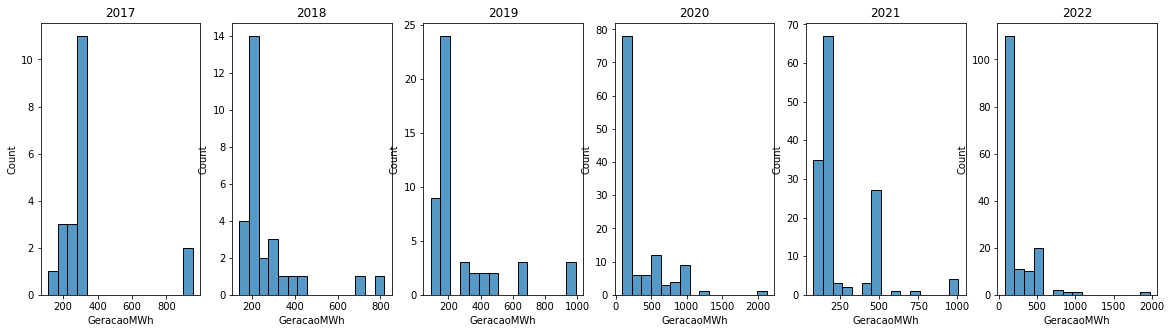

In [17]:
fig, ax = plt.subplots(1,6, figsize=(20,5))

for i,j in enumerate(range(2017,2023,1)):
    sns.histplot(x='GeracaoMWh', data=usinas_tot_par_2017[usinas_tot_par_2017['Ano']==j], bins=15,ax=ax[i])
    ax[i].set_title(j)

Todos os anos possuem valores enviesados para a direita. Aparentemente, eles seguem uma distribuição lognormal, podemos checar essa hipótese e calcular a média de uma distribuição lognormal. No entanto, podemos também considerar a mediana como uma medida de tendência central, por dar menos peso aos outliers.

Usando a mediana como métrica, pode-se extrair a mediana de geração a cada ano, e analisar a distribuição dos dados para checar se é possível aplicar regressão para prever o valor central de tendência de geração nos próximos 2 anos.

<AxesSubplot:xlabel='Ano', ylabel='GeracaoMWhMedian'>

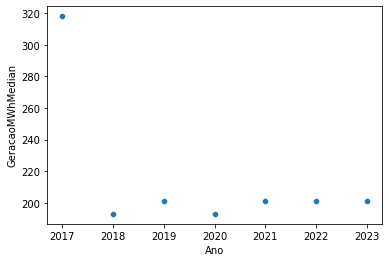

In [18]:
usinas_ger_par_median = usinas_tot_par_2017.groupby(['Ano'])['GeracaoMWh'].median().reset_index(name='GeracaoMWhMedian')
sns.scatterplot(y='GeracaoMWhMedian', x='Ano', data=usinas_ger_par_median)

Percebe-se que a mediana possui uma tendência muito mais constante, sendo 2017 o único ano outlier. Neste caso em específico, nota-se que a geração mediana dos projetos assume o mesmo valor nos últimos 2,5 anos, já incluindo os projetos de 2023. Apesar de já termos calculado uma geração média de 190MWh/mês em 2023, excluindo alguns outliers, podemos também extrair o valor exato da mediana em 2021, 2022 e 2023 e verificar se são realmente próximos.

In [19]:
usinas_ger_par_median

,Ano,GeracaoMWhMedian
0,2017,318.00
1,2018,192.96
2,2019,201.00
3,2020,192.96
4,2021,201.00
5,2022,201.00
6,2023,201.00


O valor da mediana em 2023 é um pouco maior que o valor de geração utilizado como métrica dos projetos recentes, de 190MWh/mês, calculado pela média excluindo alguns valores de geração muito acima. No entanto, o valor da media calculado pode ser visto como uma correção para um cenário mais conservador. Poderiamos também utilizar o valor da mediana no caso dos projetos recentes, e vice versa. Como os valores não estão muito distantes um do outro, ambos são aceitáveis para o cálculo. Também podemos considerar que o aumento da tecnologia nas fontes de geração, com placas solares mais eficientes (fonte: [CleanEnergyReviews](https://www.cleanenergyreviews.info/blog/most-efficient-solar-panels#:~:text=Due%20to%20the%20many%20advances,from%20250W%20to%20over%20400W)), por exemplo, pode acarretar um acréscimo de energia nos próximos anos.

Como visto, podemos utilizar o valor de 201MWh/mês como premissa de geração para cada projeto nos próximos 2 anos.
Com isso, visto que são previstas 414 novas usinas que se enquadram no negócio da Lemon, é possível calcular o possível ganho de geração da Lemon, utilizando a taxa de conversão de 6.4%.

Isso significa que a Lemon pode esperar adicionar 27 novas usinas ao seu portfolio (391×6.4%), com um ganho de 5.43GWh/mês (27×201). Somando isso aos já calculados 0.38GWh/mês, **é possível afirmar que, se a Lemon se manter dentro da área de atuação, pode esperar um aumento de 5.81GWh/mês, ou 83% da sua meta**.

Alcançar a meta atuando apenas com as distribuidoras parceiras, no entanto, não é impossível. As premissas de geração utilizadas, tanto no caso da média excluindo outliers, como no caso da mediana, pode ser vista como mais conservadoras, visto que há projetos com capacidade muito maior que, se adicionados ao portfolio Lemon, podem ajudar a alcançar o objetivo.
Logo, a Lemon pode aumentar a sua taxa de sucesso, convertendo mais usinas ao seu portfólio, ou focar em usinas com maior capacidade de geração, e conseguir atinger seu objetivo. Por exemplo, caso a Lemon consiga fechar parceria com 27 usinas de geração média de 250MWh/mês, somando aos 380MWh/mês do início de 2023, o objetivo seria atingido, com 7.13GWh/mês.

No entanto, isso seria um cenárip, e em um cenário mais pessimista, o ganho de geração pode ficar muito mais abaixo do calculado. Por isso, também vamos analisar um projeto de expansão, fechando parcerias com novas usinas.

---

## Encontrando as melhores regiões para expandir

Quais distribuidoras possuem maior número de projetos? Existe tendência de aumento? A média de geração nos projetos conectados a distribuidora é relevante?
Dado o curto prazo, no cenário de expansão é preciso ser assertivo, não sobrecarregar a equipe de negociação e fechar parceria com o mínimo distribuidoras necessárias, e que tenham o melhor benefício ao negócio.

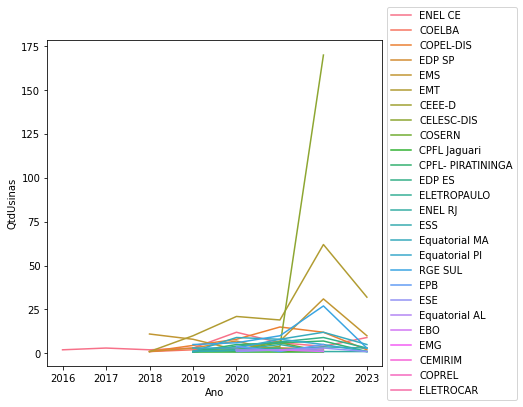

In [20]:
# seleciona apenas distribuidoras não-parceiras, cria uma coluna com o ano
# exclui 2023, sera usado em outra análise separada, pois o ano ainda está incompleto

usinas_npar = usinas_tot[usinas_tot['DistParceira']==0]
usinas_npar['Ano'] = usinas_npar['DthAtualizaCadastralEmpreend'].dt.year

usinas_npar_dist = usinas_npar.groupby(['Ano','SigAgente', 'SigUF'])['SigAgente'].count().reset_index(name='QtdUsinas')

plt.figure(figsize=(6,6))
sns.lineplot(x='Ano', y='QtdUsinas', hue='SigAgente', data=usinas_npar_dist)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Como mostrado, são diversas distribuidoras e, para facilitar a análise, um método é eliminar distribuidoras com menor número de novos projetos, e sem tendência de crescimento. Para isso, pode-se criar uma tabela para facilitar a visualização.

In [21]:
usinas_npar_dist_ano = usinas_npar_dist.pivot_table('QtdUsinas', ['SigAgente', 'SigUF'], 'Ano')
usinas_npar_dist_ano['Total'] = usinas_npar_dist_ano.sum(axis=1)
usinas_npar_dist_ano.sort_values(by=2023, ascending=False)

,Ano,2016,2017,2018,2019,2020,2021,2022,2023,Total
SigAgente,SigUF,,,,,,,,,
EMT,MT,NaN,NaN,1.0,10.0,21.0,19.0,62.0,32.0,145.0
EMS,MS,NaN,NaN,11.0,8.0,2.0,7.0,31.0,10.0,69.0
ENEL CE,CE,2.0,3.0,2.0,3.0,12.0,6.0,4.0,9.0,41.0
Equatorial MA,MA,NaN,NaN,NaN,1.0,9.0,8.0,12.0,5.0,35.0
EDP ES,ES,NaN,NaN,NaN,1.0,4.0,NaN,9.0,3.0,17.0
ESS,SP,NaN,NaN,NaN,1.0,NaN,2.0,5.0,3.0,11.0
RGE SUL,RS,NaN,NaN,NaN,5.0,6.0,10.0,27.0,3.0,51.0
COPEL-DIS,PR,NaN,NaN,1.0,NaN,8.0,15.0,12.0,2.0,38.0
CPFL- PIRATININGA,SP,NaN,NaN,NaN,1.0,5.0,NaN,7.0,1.0,14.0


Com base no número de projetos, tendência de crescimento e tempo em operação, a distribuidora com maior número de projetos é a CELESC-DIS. No entanto, há um crescimento extremamente atípico em 2022, com 170 usinas e em 2023 não há nenhum projeto, e poucos anteriormente, sem consistência nos números. É preciso analisar e entender o motivo.

As distribuidoras com consistência, e bons números de projeto selecionadas são: EMT(MT), EMS(MS), RGE SUL(RS), ENEL CE(CE), e Equatorial MA(MA). São diferentes estados e regiões, 2 no Centro-Oeste, 1 no Sul e 2 no Nordeste. Agora, é necessário entender a capacidade de geração dos projetos conectados em cada player.

<AxesSubplot:xlabel='Ano', ylabel='GeracaoMWhMedian'>

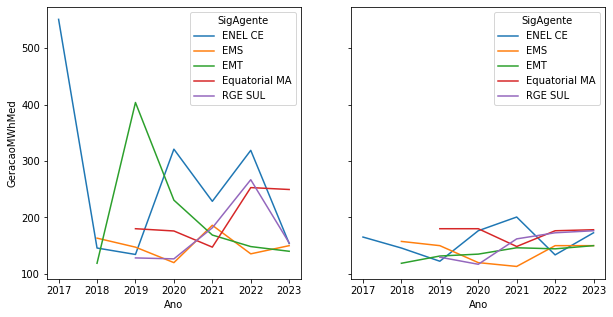

In [22]:
usinas_npar_dist_sel = usinas_npar[
    usinas_npar['SigAgente'].isin(['EMT', 'EMS', 'RGE SUL', 'ENEL CE', 'Equatorial MA']) & (usinas_npar['Ano']>2016)]

usinas_npar_dist_sel_ger_med = usinas_npar_dist_sel.groupby(
    ['Ano', 'SigAgente'])['GeracaoMWh'].mean().reset_index(name='GeracaoMWhMed')
usinas_npar_dist_sel_ger_median = usinas_npar_dist_sel.groupby(
    ['Ano', 'SigAgente'])['GeracaoMWh'].median().reset_index(name='GeracaoMWhMedian')

fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)

sns.lineplot(x='Ano', y='GeracaoMWhMed', hue='SigAgente', data=usinas_npar_dist_sel_ger_med, ax=ax[0])
sns.lineplot(x='Ano', y='GeracaoMWhMedian', hue='SigAgente', data=usinas_npar_dist_sel_ger_median, ax=ax[1])

<AxesSubplot:xlabel='Ano', ylabel='GeracaoMWh'>

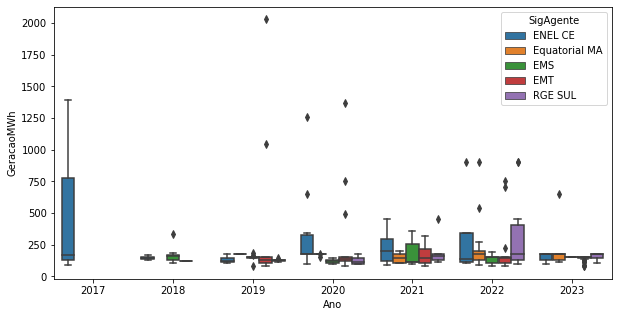

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Ano', y='GeracaoMWh', hue='SigAgente', data=usinas_npar_dist_sel)

Percebe-se que, como já visto, os dados são muito diversos, com projetos de geração muito acima se destacando. Nesse caso, com um grande número de outliers, pode-se utilizar a mediana novamente como uma medida de tendência central. Como mostrado no lineplot acima, a geração mediana é muito mais constante que a geração média, visto que ambas estão na mesma escala no eixo y.

Todas as distribuidoras selecionadas tem usinas conectadas com valores de geração similares. Nesse caso, não há necessidade de eliminar as distribuidoras com menor geração.

Para ter uma previsão de geração nos próximos anos, será necessário novamente fazer uma análise preditiva do número de usinas em cada distribuidora, e a geração esperada.

### Previsão de novos projetos nas distribuidoras selecionadas

<AxesSubplot:xlabel='Ano', ylabel='QtdUsinas'>

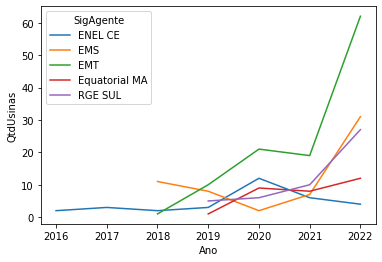

In [24]:
usinas_npar_dist = usinas_npar_dist[
    usinas_npar_dist['SigAgente'].isin(['EMT', 'EMS', 'RGE SUL', 'ENEL CE', 'Equatorial MA']) 
    & (usinas_npar_dist['Ano']!=2023)]
sns.lineplot(data=usinas_npar_dist, x='Ano', y='QtdUsinas', hue='SigAgente')

Pelo gráfico acima, pode-se analisar um crescimento em todas distribuidoras, exceto a ENEL CE, na qual há uma tendência de estabilidade/queda, com o menor número de projetos nos últimos 2 anos. A Equatorial MA mostra uma tendência de crescimento ainda tímida, quando comparada a EMT, EMS e RGE SUL, e também não conta com tantos projetos por ano. Dito isso, é possível então descartar ambas, restando EMS, EMT e RGE SUL.

Um problema, no entanto, é que a análise contempla uma divisão anual do número de projetos, e retona poucos dados para nossa análise (no máximo 5). Isso não é ideal. No caso, podemos reestrurar o dataset para dividir o número de usinas por semestre ou até mesmo trimestre, de modo a obter mais pontos e eliminar possíveis ruídos.

In [25]:
# adicionando coluna no dataset com divisão em semestres

usinas_npar['Semestre'] = usinas_npar['DthAtualizaCadastralEmpreend'].dt.year + \
     np.where(usinas_npar['DthAtualizaCadastralEmpreend'].dt.month >= 7, 0.5, 0)

usinas_npar_dist_sem = usinas_npar.groupby(['Semestre','SigAgente'])['SigAgente'].count().reset_index(name='QtdUsinas')

# interpolando uma reta para cada distribuidora

usinas_npar_dist_emt = usinas_npar_dist_sem[(usinas_npar_dist_sem['SigAgente']=='EMT')&(usinas_npar_dist_sem['Semestre']!='2023-1')]
usinas_npar_dist_ems = usinas_npar_dist_sem[(usinas_npar_dist_sem['SigAgente']=='EMS')&(usinas_npar_dist_sem['Semestre']!='2023-1')]
usinas_npar_dist_rge = usinas_npar_dist_sem[(usinas_npar_dist_sem['SigAgente']=='RGE SUL')&(usinas_npar_dist_sem['Semestre']!='2023-1')]
usinas_npar_dist_rge

,Semestre,SigAgente,QtdUsinas
17,2019.0,RGE SUL,1
29,2019.5,RGE SUL,4
43,2020.0,RGE SUL,2
56,2020.5,RGE SUL,4
72,2021.0,RGE SUL,6
90,2021.5,RGE SUL,4
108,2022.0,RGE SUL,13
126,2022.5,RGE SUL,14
139,2023.0,RGE SUL,3


In [26]:
# continução do processo de interpolação

model_emt = LinearRegression()
model_ems = LinearRegression()
model_rge = LinearRegression()

model_emt.fit(np.array(usinas_npar_dist_emt['Semestre']).reshape(-1, 1), usinas_npar_dist_emt['QtdUsinas'])
model_ems.fit(np.array(usinas_npar_dist_ems['Semestre']).reshape(-1, 1), usinas_npar_dist_ems['QtdUsinas'])
model_rge.fit(np.array(usinas_npar_dist_rge['Semestre']).reshape(-1, 1), usinas_npar_dist_rge['QtdUsinas'])

usinas_npar_dist_emt['QtdUsinasPrev'] = model_emt.predict(np.array(usinas_npar_dist_emt['Semestre']).reshape(-1, 1))
usinas_npar_dist_ems['QtdUsinasPrev'] = model_ems.predict(np.array(usinas_npar_dist_ems['Semestre']).reshape(-1, 1))
usinas_npar_dist_rge['QtdUsinasPrev'] = model_rge.predict(np.array(usinas_npar_dist_rge['Semestre']).reshape(-1, 1))

Text(0.5, 1.0, 'RGE SUL')

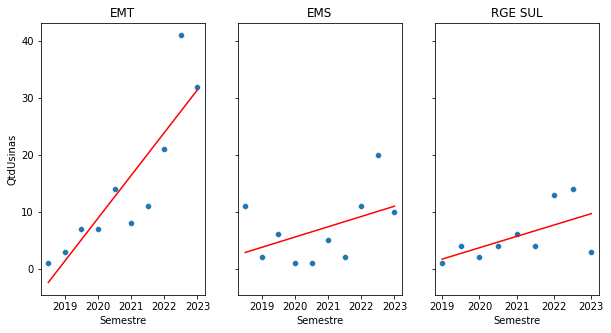

In [27]:
# plotar a visualização do numero de projetos por distribuidora e a reta calculada

fig, ax = plt.subplots(1,3,figsize=(10,5), sharey=True)

sns.scatterplot(x='Semestre', y='QtdUsinas', data=usinas_npar_dist_emt, ax=ax[0])
ax[0].plot(usinas_npar_dist_emt['Semestre'], usinas_npar_dist_emt['QtdUsinasPrev'], color='r')
ax[0].set_title('EMT')

sns.scatterplot(x='Semestre', y='QtdUsinas', data=usinas_npar_dist_ems, ax=ax[1])
ax[1].plot(usinas_npar_dist_ems['Semestre'], usinas_npar_dist_ems['QtdUsinasPrev'], color='r')
ax[1].set_title('EMS')

sns.scatterplot(x='Semestre', y='QtdUsinas', data=usinas_npar_dist_rge, ax=ax[2])
ax[2].plot(usinas_npar_dist_rge['Semestre'], usinas_npar_dist_rge['QtdUsinasPrev'], color='r')
ax[2].set_title('RGE SUL')

c:\Users\ediga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ediga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ediga\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

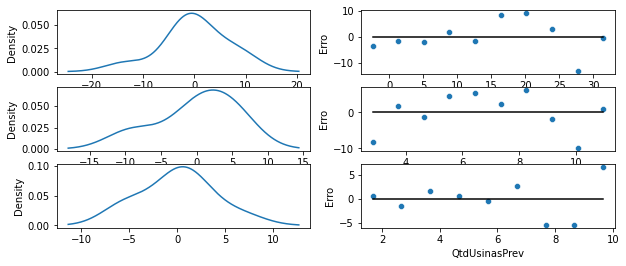

In [28]:
# analisando normalidade/homocedasticidade dos resíduos

fig, ax = plt.subplots(3,2, figsize=(10,4))

# plot de distribuicao dos erros
usinas_npar_dist_emt['Erro'] = usinas_npar_dist_emt['QtdUsinasPrev'] - usinas_npar_dist_emt['QtdUsinas']
usinas_npar_dist_ems['Erro'] = usinas_npar_dist_ems['QtdUsinasPrev'] - usinas_npar_dist_ems['QtdUsinas']
usinas_npar_dist_rge['Erro'] = usinas_npar_dist_rge['QtdUsinasPrev'] - usinas_npar_dist_rge['QtdUsinas']

usinas_npar_dist_emt['Erro'].plot(kind='kde', ax=ax[0,0])
usinas_npar_dist_ems['Erro'].plot(kind='kde', ax=ax[1,0])
usinas_npar_dist_rge['Erro'].plot(kind='kde', ax=ax[2,0])

#plot de variabilidade do erro
sns.scatterplot(usinas_npar_dist_emt['QtdUsinasPrev'], usinas_npar_dist_emt['Erro'], ax=ax[0,1])
ax[0,1].plot(usinas_npar_dist_emt['QtdUsinasPrev'], np.linspace(0, 0, 10), color='black')

sns.scatterplot(usinas_npar_dist_ems['QtdUsinasPrev'], usinas_npar_dist_ems['Erro'], ax=ax[1,1])
ax[1,1].plot(usinas_npar_dist_ems['QtdUsinasPrev'], np.linspace(0, 0, 10), color='black')

sns.scatterplot(usinas_npar_dist_rge['QtdUsinasPrev'], usinas_npar_dist_rge['Erro'], ax=ax[2,1])
ax[2,1].plot(usinas_npar_dist_rge['QtdUsinasPrev'], np.linspace(0, 0, 9), color='black')

plt.show()

Aplicar regressão linear em uma quantidade limitada de dados não é o ideal. Porém, dividindo por semestres, consegue-se obter mais dados e melhorar a regressão. Como visto acima, as métricas de validação indicam ser plausível utilizar regressão linear para prever o número de projetos em cada distribuidora, principalmente para EMT e RGE SUL. A distribuição da EMS particulamente não parece linearmente consistente, porém, para simplificação, ela atende os nossos critérios.

In [29]:
# calculo da previsão total de novas usinas por distribuidora, de acordo com a regressão
# utilizar as mesmas premissas das distribuidoras parceiras (inicio em junho e finalizar 1 mes antes)

inicio_ano_1 = 2023+6/12              # inicio em junho-2023, ou seja, após 6 meses do inicio do ano
inicio_ano_2 = inicio_ano_1+1         # inicio do ano 2

qtd_usinas_ano_1_emt = model_emt.coef_ * inicio_ano_1 + model_emt.intercept_
qtd_usinas_ano_2_emt = model_emt.coef_ * inicio_ano_2 + model_emt.intercept_

qtd_usinas_ano_1_ems = model_ems.coef_ * inicio_ano_1 + model_ems.intercept_
qtd_usinas_ano_2_ems = model_ems.coef_ * inicio_ano_2 + model_ems.intercept_

qtd_usinas_ano_1_rge = model_rge.coef_ * inicio_ano_1 + model_rge.intercept_
qtd_usinas_ano_2_rge = model_rge.coef_ * inicio_ano_2 + model_rge.intercept_

print(f'EMT: {np.round(qtd_usinas_ano_1_emt+qtd_usinas_ano_2_emt*11/12,0)} usinas')
print(f'EMS: {np.round(qtd_usinas_ano_1_ems+qtd_usinas_ano_2_ems*11/12,0)} usinas')
print(f'RGE SUL: {np.round(qtd_usinas_ano_1_rge+qtd_usinas_ano_2_rge*11/12,0)} usinas')

EMT: [74.] usinas
EMS: [24.] usinas
RGE SUL: [22.] usinas


### Análise de Geração de Novos Projetos nas Distribuidoras Selecionadas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:xlabel='Semestre', ylabel='GeracaoMWhMedian'>

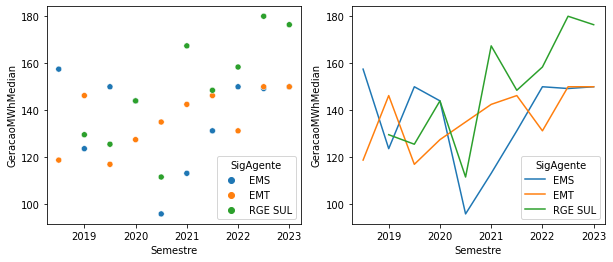

In [30]:
usinas_npar_sel = usinas_npar[
    usinas_npar['SigAgente'].isin(['EMT', 'EMS', 'RGE SUL'])]

usinas_npar_dist_sem_median = usinas_npar_sel.groupby(
    ['Semestre', 'SigAgente'])['GeracaoMWh'].median().reset_index(name='GeracaoMWhMedian')

fig, ax = plt.subplots(1,2, figsize=(10,4))

sns.scatterplot(x='Semestre', y='GeracaoMWhMedian', hue='SigAgente', data=usinas_npar_dist_sem_median, ax=ax[0])
plt.legend(loc='upper left')
sns.lineplot(x='Semestre', y='GeracaoMWhMedian', hue='SigAgente', data=usinas_npar_dist_sem_median, ax=ax[1])

Como mostrado acima no plot das medianas por projeto, em cada semestre, há uma tendência de crescimento em todas as distribuidoras, principalmente na RGE SUL, mas ainda com algumas oscilações. Mesmo que seja observado um crescimento, podemos utilizar como proxy a mediana dos últimos 2 semestres, que é similar para as três distribuidoras.

In [31]:
# plot de tabela com os valores da mediana por distribuidora nos ultimos 2 semestres

usinas_npar_dist_sem_median[usinas_npar_dist_sem_median['Semestre'].isin([2022.5, 2023.0])]

,Semestre,SigAgente,GeracaoMWhMedian
23,2022.5,EMS,149.25
24,2022.5,EMT,150.00
25,2022.5,RGE SUL,180.00
26,2023.0,EMS,150.00
27,2023.0,EMT,150.00
28,2023.0,RGE SUL,176.40


A tabela acima mostra ser possível considerar geração mediana de 150 MWh/mês para EMS e EMT, e de 177 MWh/mês para RGE SUL. Como os calculos feitos de previsão de novos projetos para os próximos 2 anos, é possível inferir a o ganho de geração por mês.

É importante ressaltar aqui o tempo de negociação para fechar a parceria com essas distribuidoras. Como pressuposto antes de iniciar a análise, o prazo médio considerado é de 6 meses.
Nesse cenário, seria importante iniciar tratativas em paralelo com essas 3 distribuidoras para tentar finalizar a parceria até o final de 2023. Desse modo, como o cálculo de novos projetos se inicia a partir de junho de 2023, essas usinas estariam em operação a pouco tempo, podendo ser considerados como projetos recentes e que podem ainda ser negociados pela Lemon, conforme feito com os projetos que já foram cadastrados em 2023.

O ganho de geração com cada distribuidora seria:

EMT: 150 × 6.4% × 74 = 710MWh/mês

EMS: 150 × 6.4% × 24 = 230MWh/mês

RGE SUL: 177 × 6.4% × 22 = 250MWh/mês

Total: 1190 MWh/mês

**O ganho total, fechando parceria com essas três distribuidoras, pode ser de aproximadamente 1.19GWh/mês. Somando isso aos já calculados 5.81GWh/mês das distribuidoras parceiras, atinge-se um valor potencial de 7GWh/mês, ou seja, exatamente 100% do objetivo!!!**

---

### FONTE DE GERAÇÃO POR DISTRIBUIDORA

Para finalizar a análise e gerar mais alguns insights, é possível analisar as fontes de energia mais utilizadas pelas distribuidoras parceiras e não parceiras selecionadas.

In [32]:
usinas_par_nparsel = usinas_tot[usinas_tot['SigAgente'].isin(
    ['CEBDIS', 'CELPE', 'CEMIG-D', 'CPFL-PAULISTA', 'ELEKTRO', 'LIGHT', 'Equatorial GO', 'EMT', 'EMS', 'RGE SUL']
)]

usinas_par_nparsel_fonte = usinas_par_nparsel.groupby(['SigAgente','DscFonteGeracao'])['DscFonteGeracao'].count()\
    .reset_index(name='QtdUsinas')

usinas_par_nparsel_fonte

,SigAgente,DscFonteGeracao,QtdUsinas
0,CEBDIS,Radiação solar,77
1,CELPE,Radiação solar,28
2,CEMIG-D,Biogás - RA,3
3,CEMIG-D,Biogás - RU,1
4,CEMIG-D,Gás de Alto Forno - Biomassa,1
5,CEMIG-D,Potencial hidráulico,30
6,CEMIG-D,Radiação solar,236
7,CPFL-PAULISTA,Radiação solar,68
8,ELEKTRO,Biogás-AGR,1
9,ELEKTRO,Potencial hidráulico,1


<AxesSubplot:xlabel='SigAgente', ylabel='QtdUsinas'>

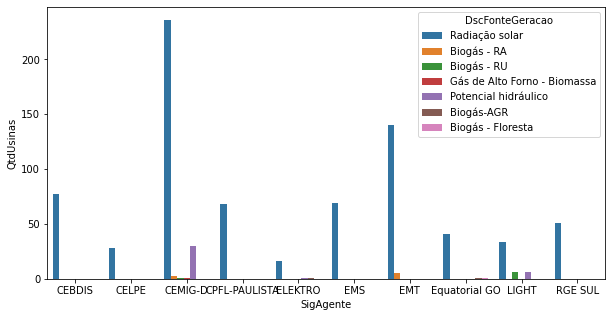

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x='SigAgente', y='QtdUsinas', hue='DscFonteGeracao', data=usinas_par_nparsel_fonte)

Não há discussão: solar fotovoltaica é de longe o tipo de geração mais conectada a todas as distribuidoras. Capacitar ainda mais o time para negociação com usinas solares pode ser o caminho para atinger um maior número de projetos.